In [1]:
import pandas as pd
import numpy as np


In [2]:
# Simulate 3 months of income and expenses
data = {
    'Date': pd.date_range(start='2024-01-01', periods=90, freq='D'),
    'Category': np.random.choice(['Groceries', 'Rent', 'Utilities', 'Transport', 'Dining', 'Income'], size=90),
    'Amount': np.random.uniform(-200, 3000, size=90)  # Expenses are negative, income is positive
}

df = pd.DataFrame(data)

# Adjust Income to be always positive, others negative
df['Amount'] = np.where(df['Category'] == 'Income', abs(df['Amount']), -abs(df['Amount']))


In [3]:
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Add Month column
df['Month'] = df['Date'].dt.to_period('M')

# Preview
print(df.head())


        Date   Category       Amount    Month
0 2024-01-01  Utilities -1209.442566  2024-01
1 2024-01-02  Groceries  -575.851977  2024-01
2 2024-01-03       Rent  -173.207980  2024-01
3 2024-01-04  Transport -2818.371110  2024-01
4 2024-01-05  Groceries  -428.842312  2024-01


In [4]:
# Total income and expenses per month
monthly_summary = df.groupby(['Month', 'Category'])['Amount'].sum().unstack().fillna(0)

# Calculate savings
monthly_summary['Savings'] = monthly_summary['Income'] + monthly_summary.drop(columns='Income').sum(axis=1)

print("\nMonthly Summary:\n", monthly_summary)



Monthly Summary:
 Category        Dining    Groceries       Income          Rent    Transport  \
Month                                                                         
2024-01  -13093.292296 -5436.610016  6280.153836  -1439.891952 -7936.745409   
2024-02   -5427.806873 -8665.509929  7167.319154 -13318.007686 -5931.271242   
2024-03    -825.859868 -8912.448188  9619.336903 -10137.697010 -3356.722143   

Category     Utilities       Savings  
Month                                 
2024-01   -1209.442566 -22835.828404  
2024-02   -5628.795623 -31804.072200  
2024-03  -12396.933751 -26010.324056  


In [5]:
# Highest spending category overall
total_by_category = df[df['Category'] != 'Income'].groupby('Category')['Amount'].sum()
print("\nTotal Spending by Category:\n", total_by_category)

# Monthly averages
avg_savings = monthly_summary['Savings'].mean()
print("\nAverage Monthly Savings: $", round(avg_savings, 2))



Total Spending by Category:
 Category
Dining      -19346.959037
Groceries   -23014.568133
Rent        -24895.596648
Transport   -17224.738793
Utilities   -19235.171940
Name: Amount, dtype: float64

Average Monthly Savings: $ -26883.41


In [6]:
df.to_csv('personal_budget_log.csv', index=False)
monthly_summary.to_csv('monthly_budget_summary.csv')


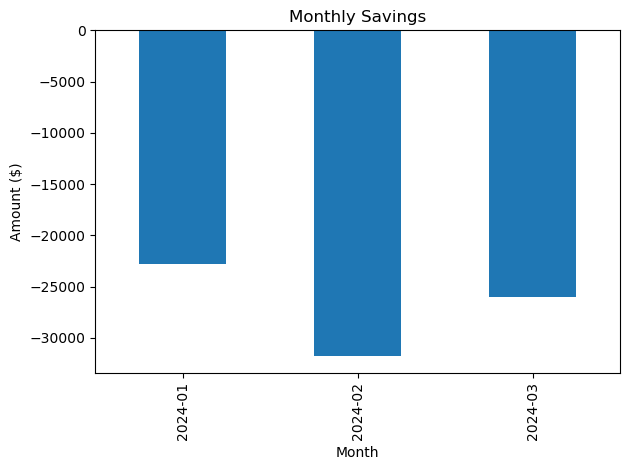

In [7]:
import matplotlib.pyplot as plt

monthly_summary['Savings'].plot(kind='bar', title="Monthly Savings")
plt.ylabel("Amount ($)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()
